#Forecasting the stock market using LSTM algorithm
*   Different methods of collecting data from Data Reader and Yahoo online and data pre-processing

### Import Library

In [70]:
!pip install ta

In [71]:
import math
import ta
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt

### Dataset Generating

In [72]:
data = pdr.get_data_yahoo('SPY', start='2017-08-01', end='2023-08-01')
print(data)

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-08-01  247.460007  247.500000  246.720001  247.320007  222.334549   
2017-08-02  247.470001  247.600006  246.369995  247.440002  222.442398   
2017-08-03  247.309998  247.339996  246.639999  246.960007  222.010910   
2017-08-04  247.520004  247.789993  246.970001  247.410004  222.415451   
2017-08-07  247.490005  247.869995  247.369995  247.869995  222.828934   
...                ...         ...         ...         ...         ...   
2023-07-25  453.920013  456.739990  453.869995  455.440002  453.839142   
2023-07-26  454.470001  456.989990  453.380005  455.510010  453.908905   
2023-07-27  459.019989  459.440002  451.549988  452.489990  450.899506   
2023-07-28  455.880005  457.779999  452.489990  456.920013  455.313965   
2023-07-31  457.410004  458.160004  456.049

In [73]:
data.shape

(1509, 6)

### Create subplots

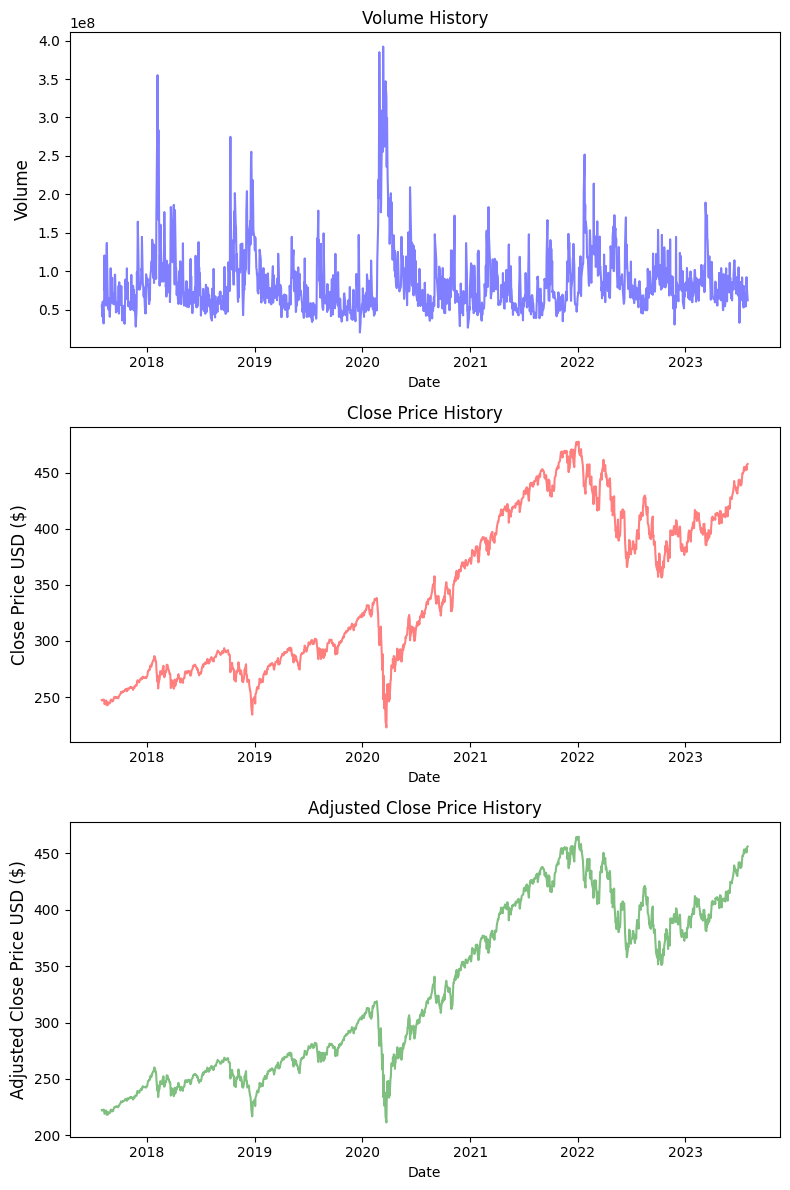

In [74]:
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Plot Volume
axs[0].set_title('Volume History')
axs[0].plot(data['Volume'], color='blue', alpha=0.5)
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Volume', fontsize=12)

# Plot Close Price
axs[1].set_title('Close Price History')
axs[1].plot(data['Close'], color='red', alpha=0.5)
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Close Price USD ($)', fontsize=12)

# Plot Adjusted Close Price
axs[2].set_title('Adjusted Close Price History')
axs[2].plot(data['Adj Close'], color='green', alpha=0.5)
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Adjusted Close Price USD ($)', fontsize=12)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

### create the 'Close Cloumn'

In [75]:
data2=data.filter(['Close'])
data2

,Close
Date,
2017-08-01,247.320007
2017-08-02,247.440002
2017-08-03,246.960007
2017-08-04,247.410004
2017-08-07,247.869995
...,...
2023-07-25,455.440002
2023-07-26,455.510010
2023-07-27,452.489990


### convert to numpy

In [76]:
dataset=data2.values

### the number of rows to be trained

In [77]:
training_data_len= math.ceil(len(dataset)*.8)
training_data_len

1208

### scale the data

In [78]:
scalar=MinMaxScaler(feature_range=(0,1))
scaled_data=scalar.fit_transform(dataset)

## Preparing data for training process and creating LSTM algorithm model for stock market forecasting

### creat scaled data for training

In [79]:
train_data=scaled_data[0:training_data_len,:]

### split data to x_train , x_test

In [80]:
x_train=[]
y_train=[]
for i in range(25,len(train_data)):
  x_train.append(train_data[i-25:i,0])
  y_train.append(train_data[i,0])

### convert  the x_train , y_train to numpy arrays

In [81]:
x_train,y_train=np.array(x_train),np.array(y_train)

### Reshape the data

In [82]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [83]:
x_train.shape

(1183, 25, 1)

### Build the LSTM model

In [84]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(40, return_sequences=True,activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(LSTM(40, return_sequences=True))
model.add(LSTM(40, return_sequences=False))  # New LSTM layer added
model.add(Dense(20))
model.add(Dense(20))  # New Dense layer added
model.add(Dense(1))   # Add final Dense layer for regression (or adjust units for your specific problem)

### Compile the model (add optimizer and loss function based on your specific task)

In [85]:
model.compile(optimizer='adam', loss='mean_squared_error')

### Train the Model

In [86]:
model.fit(x_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
37/37 [==============================] - 8s 50ms/step - loss: 0.0412
Epoch 2/100
37/37 [==============================] - 2s 67ms/step - loss: 0.0025
Epoch 3/100
37/37 [==============================] - 4s 98ms/step - loss: 0.0018
Epoch 4/100
37/37 [==============================] - 2s 66ms/step - loss: 0.0017
Epoch 5/100
37/37 [==============================] - 2s 65ms/step - loss: 0.0017
Epoch 6/100
37/37 [==============================] - 3s 74ms/step - loss: 0.0016
Epoch 7/100
37/37 [==============================] - 3s 77ms/step - loss: 0.0016
Epoch 8/100
37/37 [==============================] - 3s 94ms/step - loss: 0.0016
Epoch 9/100
37/37 [==============================] - 3s 68ms/step - loss: 0.0015
Epoch 10/100
37/37 [==============================] - 3s 75ms/step - loss: 0.0013
Epoch 11/100
37/37 [==============================] - 2s 65ms/step - loss: 0.0012
Epoch 12/100
37/37 [==============================] - 1s 34ms/step - loss: 0.0011
Epoch 13/100
37/37 [=====

### Print the model summary

In [87]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 25, 40)            6720      
                                                                 
 lstm_7 (LSTM)               (None, 25, 40)            12960     
                                                                 
 lstm_8 (LSTM)               (None, 40)                12960     
                                                                 
 dense_6 (Dense)             (None, 20)                820       
                                                                 
 dense_7 (Dense)             (None, 20)                420       
                                                                 
 dense_8 (Dense)             (None, 1)                 21        
                                                                 
Total params: 33901 (132.43 KB)
Trainable params: 3390

## Data testing and validation and stock market forecasting

### Creating the testing dataset

In [88]:
test_data=scaled_data[training_data_len-25:,:]
print(len(test_data))
x_test=[]
y_test=dataset[training_data_len:,:]
print(len(test_data))
for i in range(25,len(test_data)):
  x_test.append(test_data[i-25:i,0])

326
326


### convert x_test to numpy arrays

In [89]:
x_test=np.array(x_test)

### Reshape x_test

In [90]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

### Prediction

In [91]:
predictions=model.predict(x_test)
predictions=scalar.inverse_transform(predictions)

10/10 [==============================] - 1s 10ms/step


### The root mean squared error

In [92]:
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

1.7102087280678986

### Plot the data

<ipython-input-93-e1741ed708b6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


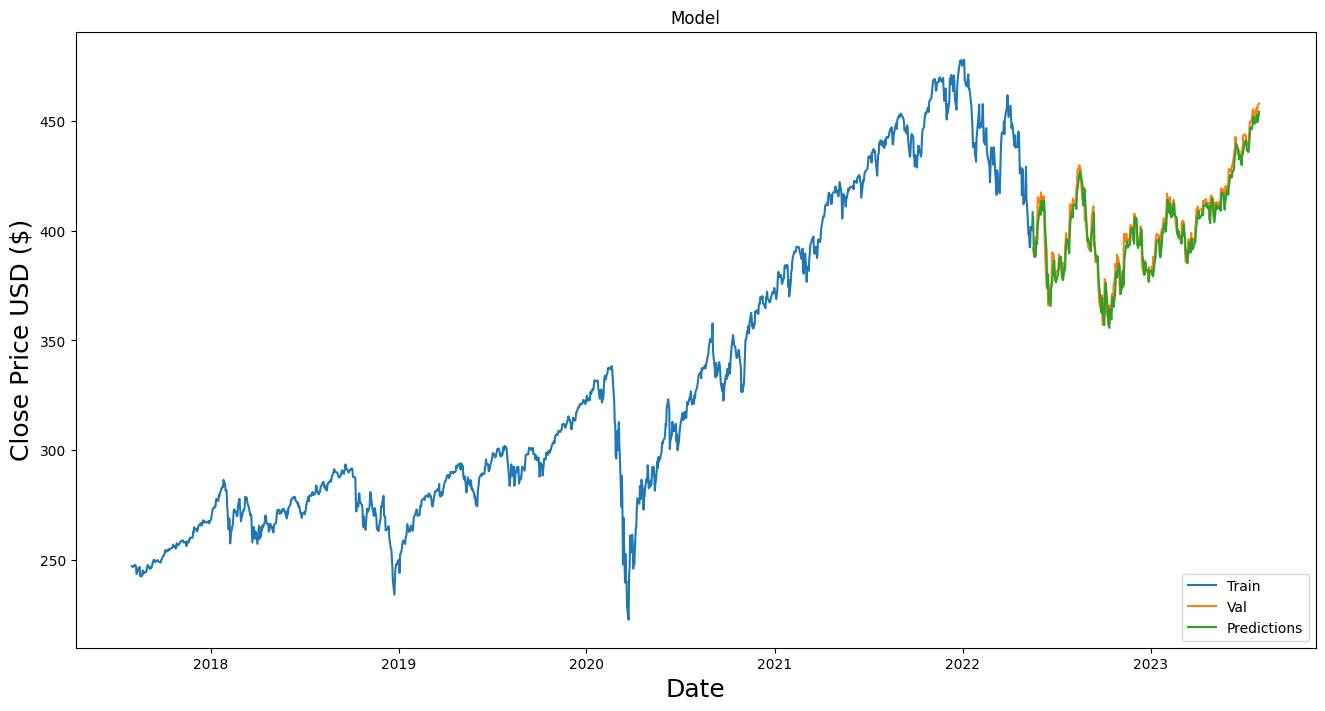

In [93]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)' , fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

### Show the valid and predicted prices

In [94]:
valid

,Open,High,Low,Close,Adj Close,Volume,Predictions
Date,,,,,,,
2022-05-18,403.500000,403.799988,390.549988,391.859985,382.556000,117674500,406.339813
2022-05-19,388.619995,394.140015,387.109985,389.459991,380.212982,98510700,392.250183
2022-05-20,393.250000,397.029999,380.540009,389.630005,380.378998,131432200,387.986084
2022-05-23,392.829987,397.730011,390.380005,396.920013,387.495941,76414900,388.271851
2022-05-24,392.559998,395.149994,386.959991,393.890015,384.537872,91448800,395.219482
...,...,...,...,...,...,...,...
2023-07-25,453.920013,456.739990,453.869995,455.440002,453.839142,55191200,451.247437
2023-07-26,454.470001,456.989990,453.380005,455.510010,453.908905,71052900,452.622864
2023-07-27,459.019989,459.440002,451.549988,452.489990,450.899506,92194400,452.550262


## gheymate ruze 91 hom

In [95]:
SPY = pdr.get_data_yahoo('SPY', start='2017-08-01', end='2023-08-01')

[*********************100%%**********************]  1 of 1 completed


### Create a new data frame

In [96]:
new_df=SPY.filter(['Close'])

### Get the last 90 day Closing price values and convert the dataframe to an array

In [97]:
last_90_days=new_df[-90:].values

### Scale the data to be values between 0 and 1

In [98]:
last_90_days_scaled=scalar.transform(last_90_days)

### Create an empty list

In [99]:
X_test=[]

X_test.append(last_90_days_scaled)

### Convert the numpy array

In [100]:
X_test=np.array(X_test)

### Reshape the data

In [101]:
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

pred_price=model.predict(X_test)

1/1 [==============================] - 1s 909ms/step


### Get the predicted scalar price

In [102]:
pred_price=scalar.inverse_transform(pred_price)
print(pred_price)

[[456.82382]]


### The price predicted by the model

In [103]:
SPY_2= pdr.get_data_yahoo('SPY', start='2023-08-01', end='2023-08-05')
print(SPY_2['Close'])

[*********************100%%**********************]  1 of 1 completed
Date
2023-08-01    456.480011
2023-08-02    450.130005
2023-08-03    448.839996
2023-08-04    446.809998
Name: Close, dtype: float64
